In [1]:
cd  /Users/driscoll/Documents/GitHub/fnc/matlab
FNC_init

[**Demo %s**](#demo-pwlin-converge)

We measure the convergence rate for piecewise linear interpolation of $e^{\sin 7x}$ over $x \in [0,1]$.

In [2]:
f = @(x) exp(sin(7 * x));
x = linspace(0, 1, 10001)';    % sample the difference at many points
n = round(10.^(1:0.25:3.5))';
maxerr = zeros(size(n));
for i = 1:length(n)
    t = (0:n(i)) / n(i);       % interpolation nodes
    p = plinterp(t, f(t));
    maxerr(i) = norm(f(x) - p(x), Inf);
end
disp(table(n(1:4:end), maxerr(1:4:end), variableNames=["n", "inf-norm error"]))

     n      inf-norm error
    ____    ______________

      10         0.15047  
     100       0.0016642  
    1000      1.6649e-05  



As predicted, a factor of 10 in $n$ produces a factor of 100 reduction in the error. In a convergence plot, it is traditional to have $h$ *decrease* from left to right, so we expect a straight line of slope $-2$ on a log-log plot.

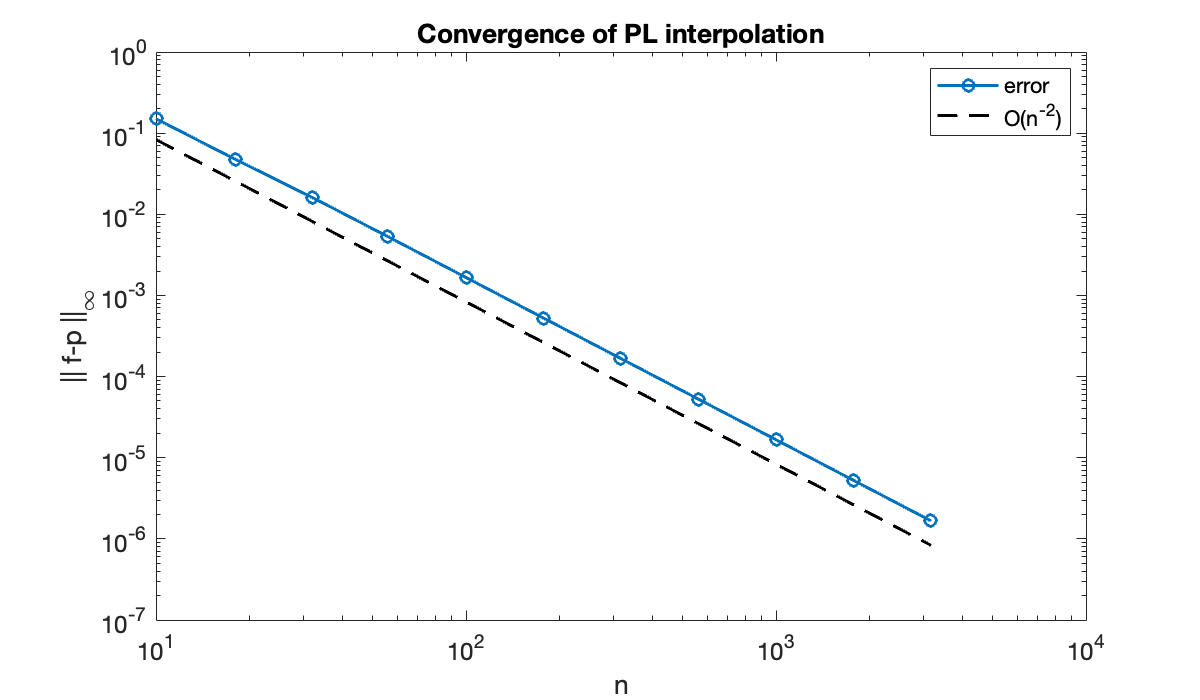

In [3]:
clf
loglog(n, maxerr, "-o", displayname="error")
order2 = 0.5 * maxerr(end) * (n / n(end)) .^ (-2);
hold on
loglog(n, order2, "k--", displayname="O(n^{-2})")
xlabel("n");  ylabel("|| f-p ||_{\infty}")
title("Convergence of PL interpolation")
legend();